In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
tbl1=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/Reynolds.xlsx')
tbl1

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


Text(0.5, 0, 'MonthsEmployed')

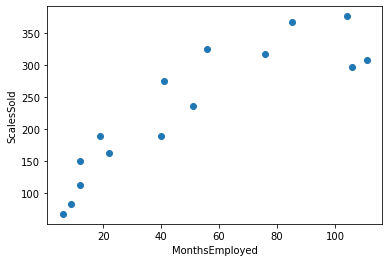

In [2]:
plt.scatter(tbl1['MonthsEmployed'],tbl1['ScalesSold'])
plt.ylabel('ScalesSold')
plt.xlabel('MonthsEmployed')

In [3]:
x=tbl1['MonthsEmployed']
y=tbl1['ScalesSold']
x1=sm.add_constant(x)
model=sm.OLS(y,x1).fit()
model.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.24e-05
Time:                        22:18:31   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.143      0.000      64.503     157.952
MonthsEmployed     2.3768      0.349      6.812      0.000       1.623       3.131
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.723
Skew:                           0.052   Prob(JB):                        0.697
Kurtosis:                       1.930   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
E=model.resid_pearson
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [5]:
y_hat=model.predict(x1)
y_hat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

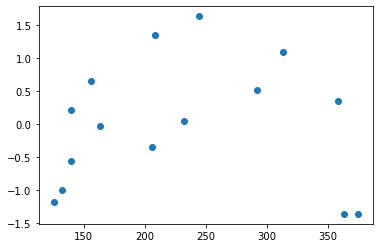

In [6]:
plt.scatter(y_hat,E)

In [7]:
x_sq=(x**2)
x_sq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [8]:
x_new=np.column_stack((x,x_sq))
x_new1=sm.add_constant(x_new)
model1=sm.OLS(y,x_new1).fit()
model1.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sun, 22 May 2022   Prob (F-statistic):           8.75e-07
Time:                        22:18:35   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.070      -4.274      94.969
x1             6.3448      1.058      5.998      0.000       4.040       8.650
x2            -0.0345      0.009     -3.854      0.002      -0.054      -0.015
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.003
Skew:                          -0.126   Prob(JB):                        0.606
Kurtosis:                       1.758   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
E1=model1.resid_pearson
E1

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [10]:
y_hat1=model1.predict(x_new1)
y_hat1

array([247.5143749 , 330.41691942, 328.36408757, 332.21125762,
       168.24230429, 116.51933758, 335.49771571, 324.72407789,
       243.96290147, 279.23569304,  99.65750913, 116.51933758,
        82.17493987, 292.50993204, 153.44961189])

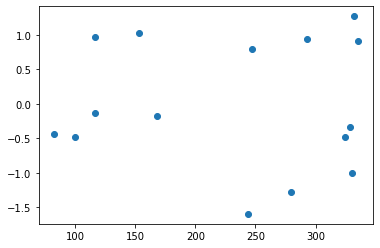

In [11]:
plt.scatter(y_hat1,E1)

In [12]:
tbl2=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/Tyler.xlsx')
tbl2

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


Text(0, 0.5, 'Sales(1000s)')

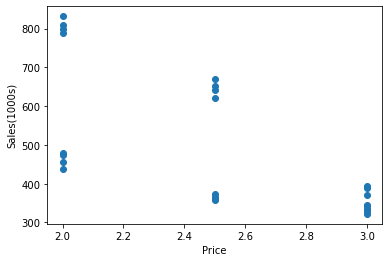

In [13]:
plt.scatter(tbl2['Price'],tbl2['Sales(1000s)'])
plt.xlabel('Price')
plt.ylabel('Sales(1000s)')


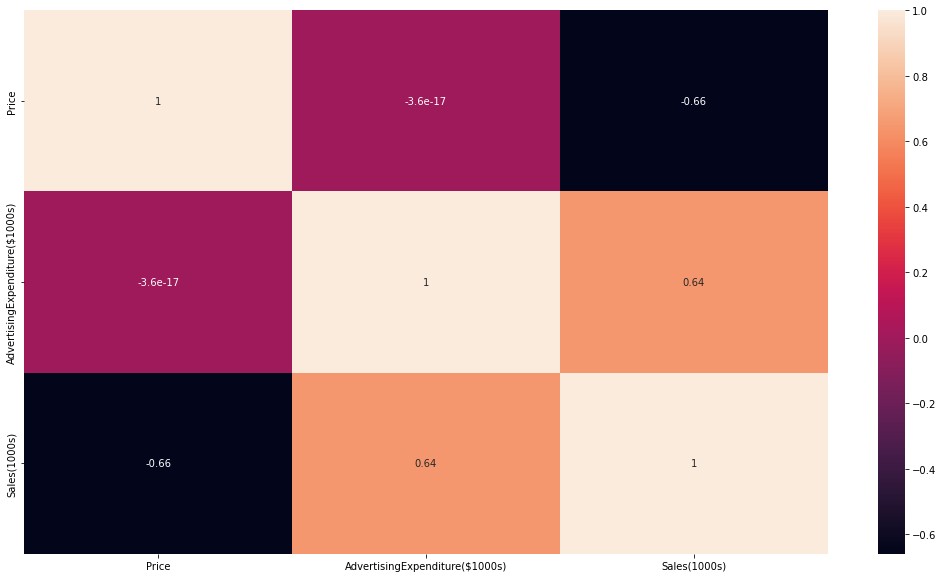

In [15]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(tbl2.corr(),annot=True)
plt.show()

Text(0, 0.5, 'Sales(1000s)')

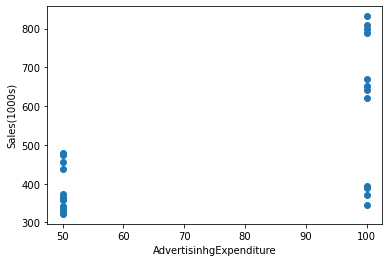

In [24]:
plt.scatter(tbl2['AdvertisingExpenditure($1000s)'],tbl2['Sales(1000s)'])
plt.xlabel('AdvertisinhgExpenditure')
plt.ylabel('Sales(1000s)')


In [26]:
x1=tbl2['AdvertisingExpenditure($1000s)']
x2=tbl2['Price']
x3=x1*x2

In [27]:
x_new=np.column_stack((x1,x2,x3))
y=tbl2['Sales(1000s)']
x_new2=sm.add_constant(x_new)
model2=sm.OLS(y,x_new2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           9.26e-17
Time:                        07:33:39   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.024    -511.218     -40.449
x1            19.6800      1.427     13.788      0.000      16.703      22.657
x2           175.0000     44.547      3.928      0.001      82.077     267.923
x3            -6.0800      0.563    -10.790      0.000      -7.255      -4.905
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   2.842
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.565
Skew:                           0.335   Prob(JB):                        0.754
Kurtosis:                       2.661   Cond. No.                     4.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
tbl3=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/MPG.xlsx')
tbl3

,MilesperGallon,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026
5,26.4,2702
6,23.9,2657
7,30.5,2106
8,18.1,3226
9,19.5,3213


Text(0, 0.5, 'MilesperGallon')

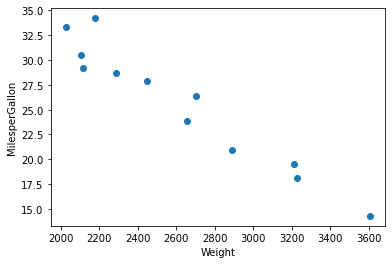

In [29]:
plt.scatter(tbl3['Weight'],tbl3['MilesperGallon'])
plt.xlabel('Weight')
plt.ylabel('MilesperGallon')

In [31]:
x=tbl3['Weight']
y=tbl3['MilesperGallon']
x1=sm.add_constant(x)
model3=sm.OLS(y,x1).fit()
model3.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MilesperGallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.85e-07
Time:                        07:46:46   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.000      50.342      61.849
Weight        -0.0116      0.001    -12.032      0.000      -0.014      -0.009
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                0.951
Skew:                           0.690   Prob(JB):                        0.621
Kurtosis:                       3.025   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
E=model3.resid_pearson
E

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [33]:
yhat=model3.predict(x1)
yhat

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

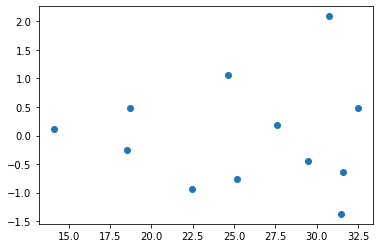

In [34]:
plt.scatter(yhat,E)

In [43]:
y_new=(np.log(y)).values.reshape(-1,1)
model4=sm.OLS(y_new,x1).fit()
model4.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           9.84e-08
Time:                        08:07:49   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.000       4.303       4.746
Weight        -0.0005   3.72e-05    -13.462      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.779
Skew:                           0.484   Prob(JB):                        0.677
Kurtosis:                       2.211   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
E1=model4.resid_pearson
E1

array([-0.31630114, -1.42005514,  1.5623004 ,  0.48370101, -0.0537228 ,
        1.60448776, -0.29474869, -0.79674991, -0.18335787,  0.87474775,
       -0.87956572, -0.58073564])

In [45]:
yhat1=model4.predict(x1)
yhat1

0     3.377221
1     3.465414
2     3.431840
3     3.297547
4     3.509009
5     3.170268
6     3.192817
7     3.468922
8     2.907694
9     2.914208
10    2.716776
11    3.077064
dtype: float64

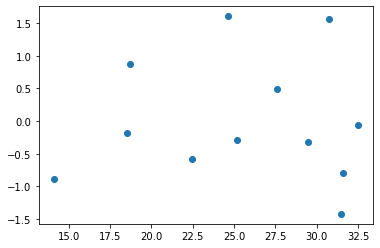

In [46]:
plt.scatter(yhat,E1)